In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image as pillow
import numpy as np
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
for physical_device in physical_devices: 
    tf.config.experimental.set_memory_growth(physical_device, True)

In [2]:
model = tf.keras.applications.MobileNetV2(include_top=True,weights='imagenet')

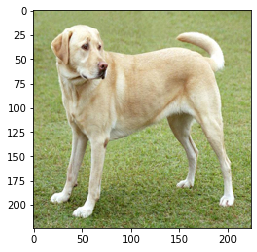

In [4]:
image = np.array(pillow.open('C:\\Users\\qwopq\\.keras\\datasets\\YellowLabradorLooking_new.jpg').resize((224,224)),dtype = 'uint8')
input_image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
input_image = np.reshape(input_image,(1,224,224,3))
plt.imshow(image)

In [15]:
z = []
result = tf.keras.applications.mobilenet_v2.decode_predictions(model.predict(input_image))[0]
for k in result:
    z.append(k[2])
result[np.argmax(z)][1:3]

('Labrador_retriever', 0.2590519)

In [16]:
def create_fake_pattern(input_image, input_label):
    input_image = tf.convert_to_tensor(input_image)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.CategoricalCrossentropy()(input_label, prediction)
        
    gradient = tape.gradient(loss, input_image)#그라디언트 반환
    signed_grad = tf.sign(gradient)#그라디언트 텐서의 각값의 부호를 반환 0 은 0으로 양수는 1로 음수는 -1로
    return signed_grad

In [17]:
fake_label = 208
fake_label = tf.keras.utils.to_categorical(fake_label,1000)
fake_label = np.reshape(fake_label,(1,1000))

In [18]:
fake_pattern = create_fake_pattern(input_image, fake_label)

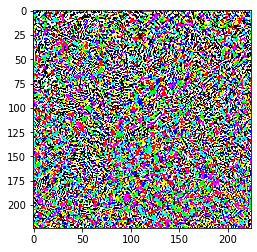

In [19]:
plt.imshow(fake_pattern[0]*0.5+0.5)

In [20]:
eps = 0.9
fake_image = (image + (fake_pattern * eps))
input_fake_image = tf.keras.applications.mobilenet_v2.preprocess_input(fake_image)
z = []
result = tf.keras.applications.mobilenet_v2.decode_predictions(model.predict(input_fake_image))[0]
for k in result:
    z.append(k[2])
result[np.argmax(z)][1:3]

('Saluki', 0.27552527)

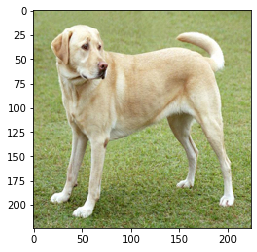

In [21]:
plt.imshow(np.reshape(fake_image,(224,224,3)).astype('uint8'))